In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
house = pd.read_csv('house_data.csv') #reading data
grade = house['grade'] # y of the data for logistic regression

In [3]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


# Features

Here I have generated new and transformed existed features: __date__ has been transformed because objects can't be fitted to train a model, so I have made a decision to transform it to datetype and than extract year, month and day; __yr_renovated__ has been changed in a way that if it was renovated then I substracted this year of renovation from 2018, if it was not I just have left 0; __yr_built__ has been changed to know how old is the building instead of year of construction

In [5]:
house['date'] = pd.to_datetime(house['date'])#transforming date column to datetype
house['year'] = house['date'].dt.year #extracting year 
house['month'] = house['date'].dt.month #month
house['day'] = house['date'].dt.day #day
house['yr_renovated'] = house['yr_renovated'].apply(lambda x: 2018 - x if x != 0 else 0)#analysing how old is a renovation
house['yr_built'] = np.abs(house['yr_built'] - 2018) #analysing how old is a building

#logistic regression features as they contain price, they can't be used in linear 
house['price/sqft_living'] = house['price']/ house['sqft_living'] # analysing price per sqrf_living
house['price/sqft_lot'] = house['price']/ house['sqft_lot'] # analysing price per sqrf_lot 
house['price/sqft_above'] = house['price']/ house['sqft_above'] # analysing price per sqrf_above
house['price/sqft_basement'] = house['price']/ house['sqft_basement'] # analysing price per sqrf_above
house['price/sqft_basement'] = house['price/sqft_basement'].replace(np.inf, 0)

house = house.drop('date', axis = 1)
house = house.drop('id', axis = 1)

# Feature Ananlysis

<Figure size 864x576 with 0 Axes>

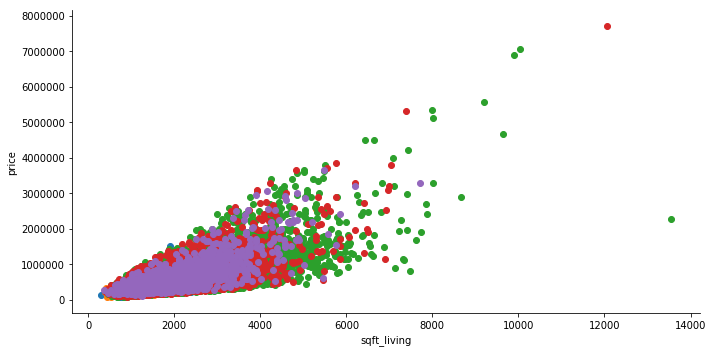

In [6]:
#visualizationg of price corresponging to sqrt_living with indication of condiditon of the property
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=house, hue='condition',size= 5, aspect=2)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

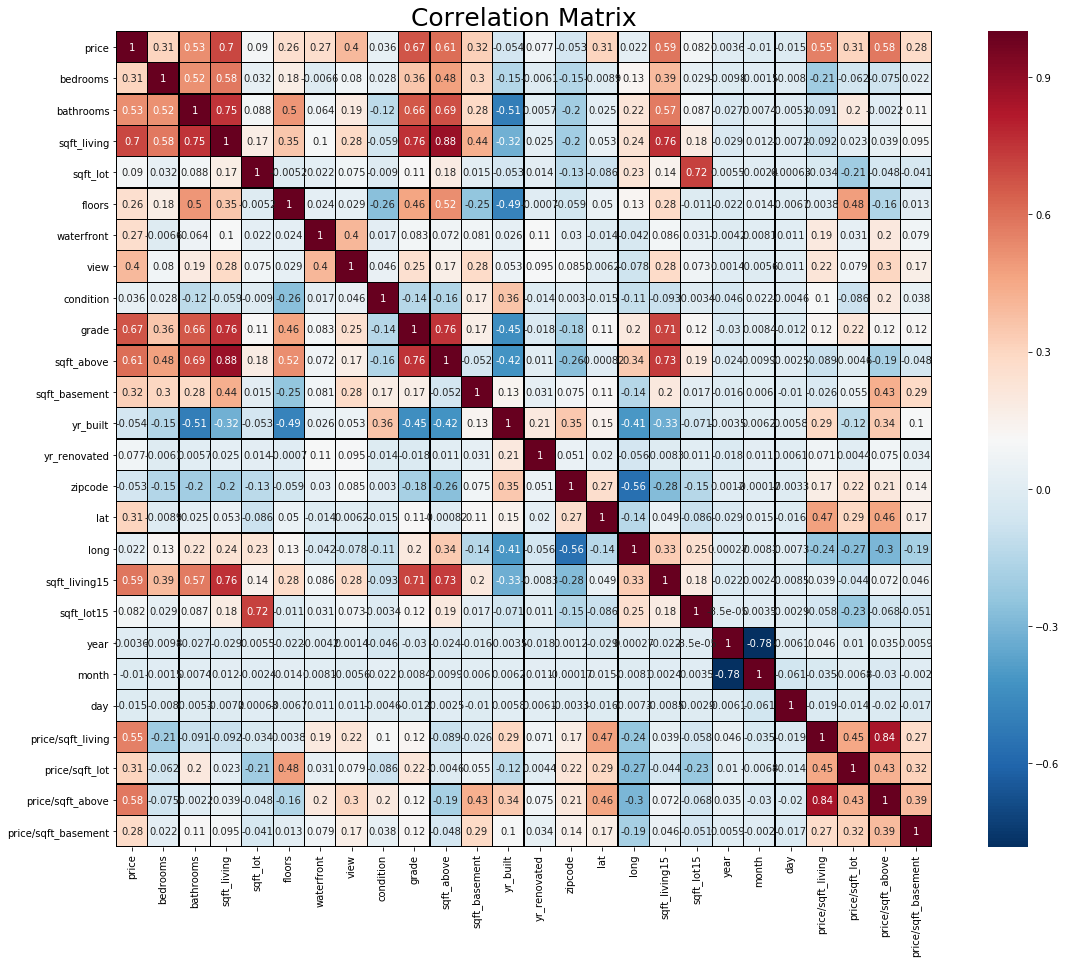

In [7]:
#creating correlation matrix to know the relation between target feature and other features
f, ax = plt.subplots(figsize=(20, 15))
plt.title('Correlation Matrix',fontsize=25)
sns.heatmap(house.corr(), linewidths=0.25, vmax=1.0, square=True, cmap="RdBu_r", linecolor='k', annot=True)

In [8]:
house = house.drop('grade', axis = 1) # dropping y from x data

In [9]:
#lists of corresponging features to fit in classification tasks
columns_grade_prediction = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year', 'month', 'day', 'price/sqft_living',
       'price/sqft_lot', 'price/sqft_above', 'price/sqft_basement']

In [10]:
# splitting train and test for price task
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    house, grade, test_size = 0.2, shuffle = True, random_state=49)
print("Logistic regression datasets")
print (X_train_logistic.shape, y_train_logistic.shape)
print (X_test_logistic.shape, y_test_logistic.shape)

Logistic regression datasets
(17290, 25) (17290,)
(4323, 25) (4323,)


# Logistic regression

Previous results:
* Accuracy train: 0.6267206477732794; test: 0.6243349525792274; 25 features, C = 1e-2
* Accuracy train: 0.6287449392712551; test: 0.6266481609993061; 25 features, C = 1 
* Accuracy train: 0.627646038172354; test: 0.6259541984732825; 25 features, C = 2 
* Accuracy train: 0.6270676691729323; test: 0.6238723108952117; 25 features, C = 10
* Accuracy train: 0.6271255060728745; test: 0.6245662734212353; 25 features, C = 15
* Accuracy train: 0.6253325621746675; test: 0.6236409900532038; 25 features, C = 50
* Accuracy train: 0.6281087333718912; test: 0.6264168401572981; 25 features, C = 100
*************************************************************************************
* Accuracy train: 0.6200115673799884; test: 0.6127689104788342; 20 features, C = 1 
* Accuracy train: 0.6201850780798149; test: 0.6109183437427712; 20 features, C = 1e-2
* Accuracy train: 0.6175245806824754; test: 0.6086051353226926; 20 features, C = 10
* Accuracy train: 0.6167727009832273; test: 0.6072172102706453; 20 features, C = 100
*************************************************************************************
* Accuracy train: 0.6128397917871602; test: 0.5991209808003701; 15 features, C = 1 
* Accuracy train: 0.609947946790052; test: 0.6000462641684016; 15 features, C = 1e-2
* Accuracy train: 0.6160786581839214; test: 0.600971547536433; 15 features, C = 10
* Accuracy train: 0.613128976286871; test: 0.5988896599583623; 15 features, C = 100
*************************************************************************************
Evaluation is measured by accurace:
\begin{equation*}
Accuracy = \frac{TP + TN}{(TP + TN + FP + FN)}
\end{equation*}
*************************************************************************************

In [11]:
logreg = LogisticRegression(multi_class='multinomial',  solver='newton-cg', C = 1)
logreg.fit(X_train_logistic, y_train_logistic)
predictions_logistic = logreg.predict(X_test_logistic)
# Summary of the predictions made by the classifier
print(classification_report(y_test_logistic , predictions_logistic))
# Accuracy score
print('Accuracy for test is', metrics.accuracy_score(y_test_logistic, predictions_logistic))
print('Accuracy for train is', metrics.accuracy_score(y_train_logistic, logreg.predict(X_train_logistic)))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          4       1.00      0.29      0.44         7
          5       0.00      0.00      0.00        49
          6       0.65      0.43      0.52       432
          7       0.69      0.82      0.75      1786
          8       0.60      0.60      0.60      1193
          9       0.49      0.48      0.48       506
         10       0.44      0.30      0.36       243
         11       0.44      0.40      0.42        83
         12       0.50      0.25      0.33        20
         13       0.00      0.00      0.00         4

avg / total       0.61      0.63      0.61      4323

Accuracy for test is 0.6266481609993061
Accuracy for train is 0.6287449392712551


/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [12]:
# to visualize easier I will take constant number of features(25) and plot score corresponding to C 
train_score = [0.6267206477732794, 0.6287449392712551, 0.627646038172354, 0.6270676691729323,
               0.6271255060728745, 0.6253325621746675, 0.6281087333718912]
test_score = [0.6243349525792274, 0.6266481609993061, 0.6259541984732825, 0.6238723108952117, 0.6245662734212353, 
              0.6236409900532038, 0.6264168401572981]
C = [1e-2, 1, 2, 10,15, 50, 100]

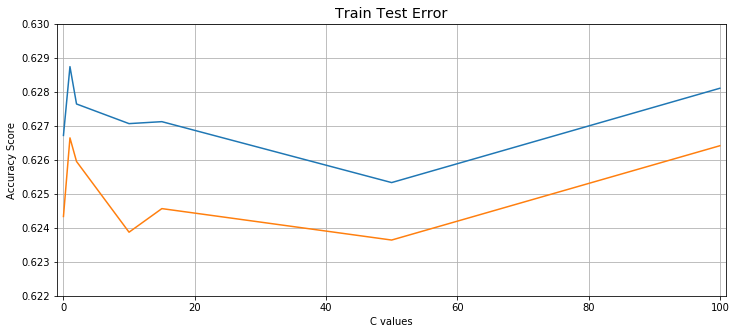

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(C, train_score)
plt.plot(C, test_score)
plt.xlim([-1, 101])
plt.ylim([0.622, 0.63])
plt.rcParams['font.size'] = 12
plt.title('Train Test Error')
plt.xlabel('C values')
plt.ylabel('Accuracy Score')
plt.grid(True)

Accuracy corresponds to percantage of correctly classified objects. From the graph above it is easy to notice that model with C = 1 scored the best. In the following code I will have a look on scaled features fitted to logistic regression. 

# Logistic regression with scaled features

In [14]:
sc = StandardScaler()
house_scaled = sc.fit_transform(house)
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    house_scaled, grade, test_size = 0.2, shuffle = True, random_state=49)
print("Logistic regression datasets")
print (X_train_logistic.shape, y_train_logistic.shape)
print (X_test_logistic.shape, y_test_logistic.shape)
logreg = LogisticRegression(multi_class='multinomial',  solver='sag', C = 1)
logreg.fit(X_train_logistic, y_train_logistic)
predictions_logistic = logreg.predict(X_test_logistic)
# Summary of the predictions made by the classifier
print(classification_report(y_test_logistic , predictions_logistic))
# Accuracy score
print('Accuracy for test is', metrics.accuracy_score(y_test_logistic, predictions_logistic))
print('Accuracy for train is', metrics.accuracy_score(y_train_logistic, logreg.predict(X_train_logistic)))

Logistic regression datasets
(17290, 25) (17290,)
(4323, 25) (4323,)
             precision    recall  f1-score   support

          4       0.00      0.00      0.00         7
          5       0.50      0.02      0.04        49
          6       0.64      0.48      0.55       432
          7       0.71      0.80      0.75      1786
          8       0.61      0.63      0.62      1193
          9       0.50      0.50      0.50       506
         10       0.48      0.34      0.40       243
         11       0.42      0.34      0.37        83
         12       0.33      0.10      0.15        20
         13       0.00      0.00      0.00         4

avg / total       0.63      0.64      0.63      4323

Accuracy for test is 0.6377515614156836
Accuracy for train is 0.6480624638519376


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree Classifier

In [15]:
dt = DecisionTreeClassifier(max_depth = 8, criterion='entropy')
dt.fit(X_train_logistic, y_train_logistic)
predictions_dt = dt.predict(X_test_logistic)
# Summary of the predictions made by the classifier
print(classification_report(y_test_logistic, predictions_dt))
# Accuracy score
print('Accuracy for test is', metrics.accuracy_score(y_test_logistic, predictions_dt))
print('Accuracy for train is', metrics.accuracy_score(y_train_logistic, dt.predict(X_train_logistic)))

             precision    recall  f1-score   support

          4       0.00      0.00      0.00         7
          5       0.20      0.08      0.12        49
          6       0.61      0.53      0.57       432
          7       0.74      0.72      0.73      1786
          8       0.59      0.66      0.62      1193
          9       0.50      0.54      0.52       506
         10       0.51      0.41      0.46       243
         11       0.44      0.41      0.42        83
         12       0.39      0.35      0.37        20
         13       0.00      0.00      0.00         4

avg / total       0.63      0.63      0.63      4323

Accuracy for test is 0.6308119361554476
Accuracy for train is 0.6882012724117987


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
